In [62]:
# -*- coding: utf-8 -*-
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit
import codecs
import re
from bs4 import BeautifulSoup # $ pip install beautifulsoup4
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#Search through the dataset directory to get all of the file directory.
mypath = '../papers/'
from os import walk
files = []
fileName = []
d = [mypath]
for (dirpath, dirnames, filenames) in walk(mypath):
    if(dirpath)!='./': dirpath+="/"
    files.extend([dirpath+s for s in filenames])
    fileName.extend([s for s in filenames])

from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from cStringIO import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = file(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

#Convert Example
#content = convert_pdf_to_txt('papers/Virach Sornlertlamvanich/c7a39b0ff3790651b2297f90f6b0c5bbb632.pdf')

In [4]:
def read_all_pdf(files):
    contents = []
    professor_names = []
    direc = []
    error_counts = 0
    success_counts = 0
    start = timeit.default_timer()
    for file in files:
        professor_name = file.split("/")[2]
        try:
            content = convert_pdf_to_txt(file)
            contents.append(content)
            professor_names.append(professor_name)
            direc.append(file)
            success_counts+=1
        except Exception:
            print("error reading "+file+". Moving on..")
            error_counts+=1
    stop = timeit.default_timer()
    print("Execution time : "+str(round(stop - start,2))+"s.")    
    
    papers_df = pd.DataFrame({'name':professor_names,'content':contents,'directory':direc},columns=['name','content','directory'])
    return papers_df

In [5]:
paper_df = pd.read_csv('../dataset/paper_content.csv',encoding='utf-8')

In [6]:
paper_df['name'].value_counts()

Virach Sornlertlamvanich      57
THANARUK THEERAMUNKONG        48
Bunyarit Uyyanonvara          41
Chalie Charoenlarpnopparut    37
Boontawee Suntisrivaraporn    37
Stanislav S. Makhanov         34
Waree Kongprawechnon          30
Cholwich Nattee               28
Banlue Srisuchinwong          23
Pakinee Aimmanee              23
Ekawit Nantajeewarawat        19
Nirattaya Khamsemanan         18
Gun Srijuntongsiri            15
Itthisek Nilkhamhang          14
Toshiaki Kondo                14
Komwut Wipusitwarakun          6
Prapun Suksompong              1
Name: name, dtype: int64

In [7]:
print(paper_df.shape)
paper_df.head(10)

(445, 5)


,name,content,directory,isValid,cleaned_content
0,Banlue Srisuchinwong,"Thammasat \r\n\r\nInt. J. Sc. Tech., Vol.6, No...",./papers/Banlue Srisuchinwong/10.1.1.575.5384.pdf,True,thammasat int sc tech vol january april cmos c...
1,Banlue Srisuchinwong,A LOW-POWER LOW-MISMATCH LOW-GLITCH CLASS ...,./papers/Banlue Srisuchinwong/10.1109@TENCON.2...,True,low power low mismatch low glitch class ab fir...
2,Banlue Srisuchinwong,\r\n\r\n \r\n\r\nChaotic Modeling and Simulat...,./papers/Banlue Srisuchinwong/18_CMSIM_2013_Mu...,True,chaotic modeling simulation cmsim chaos modifi...
3,Banlue Srisuchinwong,This paper is a postprint of a paper submitted...,./papers/Banlue Srisuchinwong/2 2014 Post Prin...,True,paper postprint paper submitted accepted publi...
4,Banlue Srisuchinwong,Electronic version of an article published as ...,./papers/Banlue Srisuchinwong/2 Postprint.pdf,True,electronic version article published journal c...
5,Banlue Srisuchinwong,\r\n\r\n \r\n\r\nChaotic Modeling and Simulat...,./papers/Banlue Srisuchinwong/22_CMSIM_2013_Ph...,True,chaotic modeling simulation cmsim chaos compou...
6,Banlue Srisuchinwong,Physics Letters A 373 (2009) 4038–4043\r\n\r\n...,./papers/Banlue Srisuchinwong/2_In Press_7 Oct...,True,physic letter content list available sciencedi...
7,Banlue Srisuchinwong,"Proceedings of World Academy of Science, Engin...",./papers/Banlue Srisuchinwong/407fulltext.pd,True,proceeding world academy science engineering t...
8,Banlue Srisuchinwong,Improved Implementation of Sprott’s Chaotic \r...,./papers/Banlue Srisuchinwong/493_pub_25.pdf,True,improved implementation sprott chaotic oscilla...
9,Banlue Srisuchinwong,\r\nSirindhorn International Institute of Tec...,./papers/Banlue Srisuchinwong/54b0ef4f03ec2e36...,True,sirindhorn international institute technology ...


In [8]:
def isEnglish(s):
    #Could check all character but waste of time.
    return 'e' in s or 'a' in s

In [9]:
cleaned_papers_pdf = paper_df
cleaned_papers_pdf['isValid'] = cleaned_papers_pdf['content'].apply(isEnglish)
cleaned_papers_pdf = cleaned_papers_pdf[cleaned_papers_pdf['isValid']==True]

In [10]:
cleaned_papers_pdf['isValid'].value_counts()

True    441
Name: isValid, dtype: int64

In [11]:
#Content2Words (or String to words seperate by space)
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem import WordNetLemmatizer

def content_to_words( paper_content ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", paper_content) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))           
    stops.add('cid')
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops] 
    
    # 5. Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    meaningful_words = [wordnet_lemmatizer.lemmatize(w) for w in meaningful_words if len(w)!=1 or w in['a','i','u']]
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   
words = content_to_words('testing to convert and also cleaning. Yeah') 
print(words)

In [12]:
#Cleaning all of the content csv
start = timeit.default_timer()
cleaned_papers_pdf['cleaned_content'] = cleaned_papers_pdf['content'].apply(content_to_words)
stop = timeit.default_timer()
print("Execution time : "+str(round(stop - start,2))+"s.")    

Execution time : 10.63s.


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [13]:
cleaned_papers_pdf.head(10)

,name,content,directory,isValid,cleaned_content
0,Banlue Srisuchinwong,"Thammasat \r\n\r\nInt. J. Sc. Tech., Vol.6, No...",./papers/Banlue Srisuchinwong/10.1.1.575.5384.pdf,True,thammasat int sc tech vol january april cmos c...
1,Banlue Srisuchinwong,A LOW-POWER LOW-MISMATCH LOW-GLITCH CLASS ...,./papers/Banlue Srisuchinwong/10.1109@TENCON.2...,True,low power low mismatch low glitch class ab fir...
2,Banlue Srisuchinwong,\r\n\r\n \r\n\r\nChaotic Modeling and Simulat...,./papers/Banlue Srisuchinwong/18_CMSIM_2013_Mu...,True,chaotic modeling simulation cmsim chaos modifi...
3,Banlue Srisuchinwong,This paper is a postprint of a paper submitted...,./papers/Banlue Srisuchinwong/2 2014 Post Prin...,True,paper postprint paper submitted accepted publi...
4,Banlue Srisuchinwong,Electronic version of an article published as ...,./papers/Banlue Srisuchinwong/2 Postprint.pdf,True,electronic version article published journal c...
5,Banlue Srisuchinwong,\r\n\r\n \r\n\r\nChaotic Modeling and Simulat...,./papers/Banlue Srisuchinwong/22_CMSIM_2013_Ph...,True,chaotic modeling simulation cmsim chaos compou...
6,Banlue Srisuchinwong,Physics Letters A 373 (2009) 4038–4043\r\n\r\n...,./papers/Banlue Srisuchinwong/2_In Press_7 Oct...,True,physic letter content list available sciencedi...
7,Banlue Srisuchinwong,"Proceedings of World Academy of Science, Engin...",./papers/Banlue Srisuchinwong/407fulltext.pd,True,proceeding world academy science engineering t...
8,Banlue Srisuchinwong,Improved Implementation of Sprott’s Chaotic \r...,./papers/Banlue Srisuchinwong/493_pub_25.pdf,True,improved implementation sprott chaotic oscilla...
9,Banlue Srisuchinwong,\r\nSirindhorn International Institute of Tec...,./papers/Banlue Srisuchinwong/54b0ef4f03ec2e36...,True,sirindhorn international institute technology ...


In [15]:
cleaned_papers_pdf.to_csv('cleaned_paper_content.csv',index=False ,encoding="utf-8")

In [17]:
#Creating Bags of Words
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(cleaned_papers_pdf['cleaned_content'])
print("Created bag of words")

Creating the bag of words...

Created bag of words


In [18]:
freqs = [(word, train_data_features.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
#sort from largest to smallest
print(sorted(freqs, key = lambda x: -x[1]))

[('based', 7525), ('system', 7499), ('word', 7210), ('method', 6721), ('image', 6338), ('set', 6213), ('using', 6117), ('algorithm', 5775), ('result', 5722), ('figure', 5522), ('language', 5398), ('used', 5320), ('data', 5189), ('two', 5157), ('one', 5102), ('model', 5027), ('number', 4888), ('de', 4420), ('information', 4405), ('time', 4394), ('also', 4295), ('example', 4239), ('problem', 3850), ('al', 3732), ('table', 3727), ('value', 3709), ('et', 3706), ('case', 3702), ('text', 3660), ('feature', 3596), ('fig', 3585), ('point', 3397), ('rule', 3387), ('term', 3381), ('approach', 3337), ('concept', 3292), ('proposed', 3053), ('pp', 3053), ('error', 2998), ('work', 2962), ('ontology', 2898), ('show', 2891), ('section', 2860), ('class', 2855), ('university', 2801), ('document', 2790), ('shown', 2772), ('function', 2760), ('use', 2759), ('technique', 2717), ('process', 2703), ('new', 2673), ('given', 2599), ('cation', 2568), ('type', 2564), ('however', 2549), ('matrix', 2542), ('name',

In [19]:
train_data_features.shape

(441, 5000)

In [31]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=450, random_state=42)
reduced_X = svd.fit_transform(train_data_features) 

In [32]:
print(svd.explained_variance_ratio_) 

[ 0.24441184  0.17982272]


In [33]:
reduced_X

array([[  1.85238970e+01,   7.62810565e+00],
       [  2.81850116e+01,  -2.91653034e-01],
       [  1.72709899e+01,   6.85516087e+00],
       [  1.47647903e+01,  -8.01145590e-01],
       [  2.94143980e+01,   3.94848047e+00],
       [  1.49521041e+01,   2.68477528e+00],
       [  3.03164946e+01,  -3.60059984e+00],
       [  3.30624580e+01,   2.13963172e+00],
       [  3.16635786e+01,  -2.18571050e+00],
       [  1.91120408e+01,  -4.46771875e-02],
       [  3.59607938e+01,   1.52343028e+00],
       [  2.35697650e+01,   1.81404900e+00],
       [  7.62249863e+01,   1.16231576e+01],
       [  2.73169721e+01,  -1.25587052e+00],
       [  1.65963438e+01,   4.25626426e+00],
       [  3.38687913e+01,   9.21526719e-01],
       [  1.06025596e+01,   2.82220568e+00],
       [  5.65716790e+01,   8.55792208e-01],
       [  2.59398138e+01,   1.91430387e+00],
       [  2.22588200e+01,   5.44966758e+00],
       [  2.74450540e+01,   2.74865057e+00],
       [  2.33201544e+01,   3.68978381e+00],
       [  

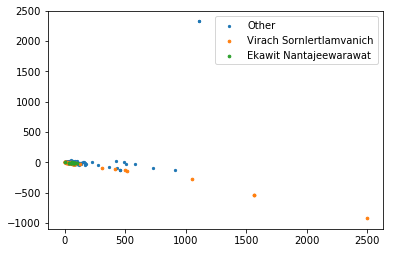

In [35]:
# get the indices where data is 1
def focus_professor(names):
    
    isnOwner = reduced_X[cleaned_papers_pdf['name'].apply(lambda x: x not in names)]
    x,y = isnOwner.T
    plt.scatter(x,y,s=5,label='Other')

    for name in names:
        isOwner = reduced_X[cleaned_papers_pdf['name'].apply(lambda x: name in x)]
        x,y = isOwner.T
        plt.scatter(x,y,s=7,label=name)
    plt.legend()
    plt.show()
focus_professor(['Virach Sornlertlamvanich','Ekawit Nantajeewarawat'])

In [36]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train_data_features)
distances, indices = nbrs.kneighbors(train_data_features)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:211: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


In [37]:
indices

array([[  0, 308],
       [  1,   0],
       [  2,   3],
       [  3,  16],
       [  4,   3],
       [  5, 308],
       [  6,  20],
       [  7,  19],
       [  8,   3],
       [  9,  13],
       [ 10,   0],
       [ 11,  14],
       [ 12,   1],
       [ 13,   9],
       [ 14,  11],
       [ 15, 134],
       [ 16,  22],
       [ 17,   6],
       [ 18,   6],
       [ 19,   0],
       [ 20,   5],
       [ 21,   5],
       [ 22,  16],
       [ 23,  41],
       [ 24,  41],
       [ 25,  29],
       [ 26,  45],
       [ 27,  77],
       [ 28,  43],
       [ 29, 308],
       [ 30,  50],
       [ 31, 308],
       [ 32,  50],
       [ 33,  46],
       [ 34,  49],
       [ 35,  31],
       [ 36,  41],
       [ 37, 315],
       [ 38,  31],
       [ 39, 403],
       [ 40,  42],
       [ 41,  36],
       [ 42,  31],
       [ 43,  34],
       [ 44, 371],
       [ 45,  41],
       [ 46,  31],
       [ 47,  31],
       [ 48,  31],
       [ 49,  46],
       [ 50,  30],
       [ 51,  48],
       [ 52,

In [148]:
cleaned_papers_pdf.ix[indices[0]] #Example of 1 pair
#Maybe we will can find duplication from 2-KNN

,name,content,directory,isValid,cleaned_content,cluster
0,Banlue Srisuchinwong,"Thammasat \r\n\r\nInt. J. Sc. Tech., Vol.6, No...",./papers/Banlue Srisuchinwong/10.1.1.575.5384.pdf,True,thammasat int sc tech vol january april cmos c...,0
354,Toshiaki Kondo,ScienceAsia 35 (2009): 196–202\r\n\r\ndoi: 10....,./papers/Toshiaki Kondo/6b7bdb7ff04ec1d8cfbc7f...,True,scienceasia doi scienceasia robust motion esti...,0
366,Virach Sornlertlamvanich,Language Sense and Ambiguity in Thai\r\n\...,./papers/Virach Sornlertlamvanich/1dcce2f73d71...,True,language sense ambiguity thai thepchai supnith...,0
376,Virach Sornlertlamvanich,A Dependency Parser for Thai\r\n\r\nShisanu To...,./papers/Virach Sornlertlamvanich/A_Dependency...,True,dependency parser thai shisanu tongchim randol...,0
397,Virach Sornlertlamvanich,Towards Building a Corpus-based Dictionary for...,./papers/Virach Sornlertlamvanich/LREC-2000-Po...,True,towards building corpus based dictionary non w...,0


In [149]:
cleaned_papers_pdf.ix[indices[20]]

,name,content,directory,isValid,cleaned_content,cluster
20,Banlue Srisuchinwong,Physics Letters A 375 (2011) 1445–1450\r\n\r\n...,./papers/Banlue Srisuchinwong/paper354.pdf,True,physic letter content list available sciencedi...,0
5,Banlue Srisuchinwong,\r\n\r\n \r\n\r\nChaotic Modeling and Simulat...,./papers/Banlue Srisuchinwong/22_CMSIM_2013_Ph...,True,chaotic modeling simulation cmsim chaos compou...,0
398,Virach Sornlertlamvanich,Data Category Registry: Morpho-syntactic and\r...,./papers/Virach Sornlertlamvanich/LREC2008Marr...,True,data category registry morpho syntactic syntac...,0
339,THANARUK THEERAMUNKONG,ACL-IJCNLP2009KRAQ20092009WorkshoponKnowledgea...,./papers/THANARUK THEERAMUNKONG/Thanaruk Theer...,True,acl ijcnlp kraq workshoponknowledgeandreasonin...,0
376,Virach Sornlertlamvanich,A Dependency Parser for Thai\r\n\r\nShisanu To...,./papers/Virach Sornlertlamvanich/A_Dependency...,True,dependency parser thai shisanu tongchim randol...,0


In [44]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(train_data_features)
distances, indices = nbrs.kneighbors(train_data_features)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:211: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


In [45]:
indices

array([[  0, 354, 366, 376, 397],
       [  1,   0,  14,  16,  22],
       [  2,   3,  22,  16,   5],
       ..., 
       [438, 411, 412, 430, 436],
       [439, 435, 339, 368, 397],
       [440, 308, 376, 397, 354]], dtype=int64)

In [150]:
#One cluster example
cleaned_papers_pdf.ix[indices[0]]

,name,content,directory,isValid,cleaned_content,cluster
0,Banlue Srisuchinwong,"Thammasat \r\n\r\nInt. J. Sc. Tech., Vol.6, No...",./papers/Banlue Srisuchinwong/10.1.1.575.5384.pdf,True,thammasat int sc tech vol january april cmos c...,0
354,Toshiaki Kondo,ScienceAsia 35 (2009): 196–202\r\n\r\ndoi: 10....,./papers/Toshiaki Kondo/6b7bdb7ff04ec1d8cfbc7f...,True,scienceasia doi scienceasia robust motion esti...,0
366,Virach Sornlertlamvanich,Language Sense and Ambiguity in Thai\r\n\...,./papers/Virach Sornlertlamvanich/1dcce2f73d71...,True,language sense ambiguity thai thepchai supnith...,0
376,Virach Sornlertlamvanich,A Dependency Parser for Thai\r\n\r\nShisanu To...,./papers/Virach Sornlertlamvanich/A_Dependency...,True,dependency parser thai shisanu tongchim randol...,0
397,Virach Sornlertlamvanich,Towards Building a Corpus-based Dictionary for...,./papers/Virach Sornlertlamvanich/LREC-2000-Po...,True,towards building corpus based dictionary non w...,0


In [153]:
#Doing Cluster to 5 group.
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=5, random_state=0).fit(train_data_features)

In [154]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [155]:
cleaned_papers_pdf['cluster'] = kmeans.labels_

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


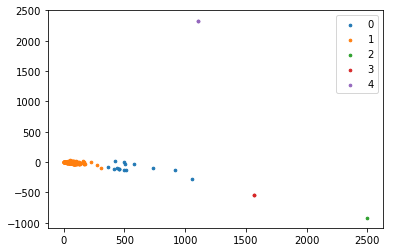

In [156]:
# get the indices where data is 1
def PCA_scatter_plot(seperator='cluster'):
    labels = set(cleaned_papers_pdf[seperator])
    for label in labels:
        isIncluded = reduced_X[cleaned_papers_pdf[seperator].apply(lambda x: x==label)]
        x,y = isIncluded.T
        plt.scatter(x,y,s=7,label=label)
    plt.legend()
    plt.show()
PCA_scatter_plot()

In [158]:
cleaned_papers_pdf[cleaned_papers_pdf['cluster']==0]

,name,content,directory,isValid,cleaned_content,cluster
26,Boontawee Suntisrivaraporn,Polynomial-Time Reasoning Support\r\n\r\nfor D...,./papers/Boontawee Suntisrivaraporn/1233830966...,True,polynomial time reasoning support design maint...,0
28,Boontawee Suntisrivaraporn,\r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\nProceeding...,./papers/Boontawee Suntisrivaraporn/285fffb1ce...,True,proceeding joint international workshop linked...,0
133,Chalie Charoenlarpnopparut,Minerva Access is the Institutional Repositor...,./papers/Chalie Charoenlarpnopparut/Chalie Cha...,True,minerva access institutional repository univer...,0
157,Cholwich Nattee,Contents \r\n\r\n \r\n \r\n \r\n\r\nA Fuzzy S...,./papers/Cholwich Nattee/Cholwich Nattee_CC3F2...,True,content fuzzy set approach query syntax analys...,0
162,Cholwich Nattee,A STUDY ON DOCUMENT RELATION DISCOVERY\r\n\r\n...,./papers/Cholwich Nattee/IT-PhD-2006-03_Thesis...,True,study document relation discovery using freque...,0
196,Gun Srijuntongsiri,Semideﬁnite and Cone Programming Bibliography/...,./papers/Gun Srijuntongsiri/Gun Srijuntongsiri...,True,semide nite cone programming bibliography comm...,0
257,Pakinee Aimmanee,Audio Information Hiding Based on\r\n\r\nSing...,./papers/Pakinee Aimmanee/paper.pdf,True,audio information hiding based singular spectr...,0
327,THANARUK THEERAMUNKONG,Lecture Notes in Computer Science\r\nCommenced...,./papers/THANARUK THEERAMUNKONG/Intelligence_a...,True,lecture note computer science commenced public...,0
335,THANARUK THEERAMUNKONG,IJCNLP 2011Proceedings ofthe 9th Workshop onAs...,./papers/THANARUK THEERAMUNKONG/Thanaruk Theer...,True,ijcnlp proceeding ofthe th workshop onasian la...,0
337,THANARUK THEERAMUNKONG,IJCNLP 2011Proceedings ofthe 9th Workshop onAs...,./papers/THANARUK THEERAMUNKONG/THANARUK THEER...,True,ijcnlp proceeding ofthe th workshop onasian la...,0


In [159]:
def wordCloud(df):
    text = " ".join(df)
    wordcloud = WordCloud().generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

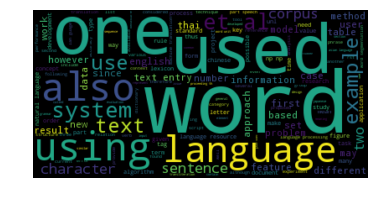

In [64]:
wordCloud(cleaned_papers_pdf['cleaned_content'][cleaned_papers_pdf['name']=='Virach Sornlertlamvanich'])

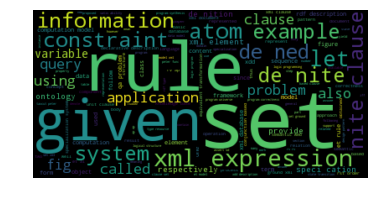

In [65]:
wordCloud(cleaned_papers_pdf['cleaned_content'][cleaned_papers_pdf['name']=='Ekawit Nantajeewarawat'])

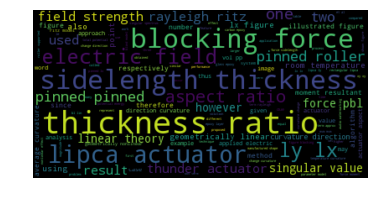

In [67]:
wordCloud(cleaned_papers_pdf['cleaned_content'][cleaned_papers_pdf['name']=='Pakinee Aimmanee'])

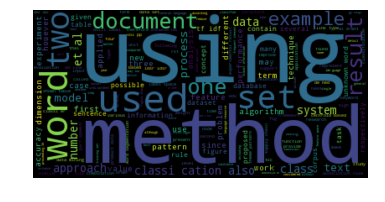

In [152]:
wordCloud(cleaned_papers_pdf['cleaned_content'][cleaned_papers_pdf['name']=='THANARUK THEERAMUNKONG'])

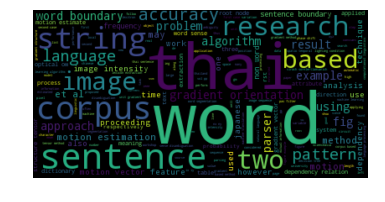

In [151]:
#TODO : IDf
wordCloud(cleaned_papers_pdf['cleaned_content'].ix[indices[0]])

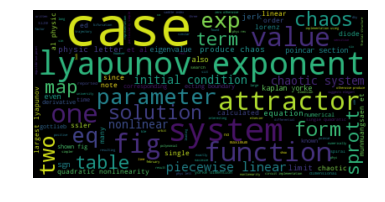

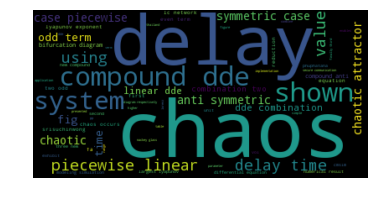

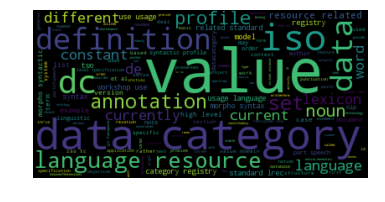

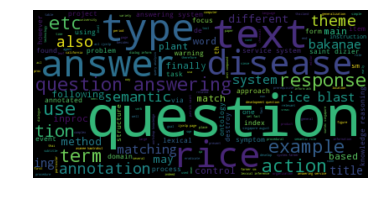

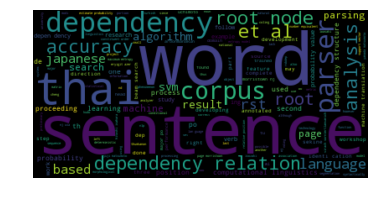

In [145]:
def showSimilarPaper(row):
    for i in indices[row]:
        try:
            wordcloud = WordCloud().generate(cleaned_papers_pdf['cleaned_content'].ix[i])
            plt.figure()
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.show()
        except Exception:
            print("Invalid Paper Content.")
showSimilarPaper(20)

In [143]:
cleaned_papers_pdf.ix[indices[20]]

,name,content,directory,isValid,cleaned_content,cluster
20,Banlue Srisuchinwong,Physics Letters A 375 (2011) 1445–1450\r\n\r\n...,./papers/Banlue Srisuchinwong/paper354.pdf,True,physic letter content list available sciencedi...,0
5,Banlue Srisuchinwong,\r\n\r\n \r\n\r\nChaotic Modeling and Simulat...,./papers/Banlue Srisuchinwong/22_CMSIM_2013_Ph...,True,chaotic modeling simulation cmsim chaos compou...,0
398,Virach Sornlertlamvanich,Data Category Registry: Morpho-syntactic and\r...,./papers/Virach Sornlertlamvanich/LREC2008Marr...,True,data category registry morpho syntactic syntac...,0
339,THANARUK THEERAMUNKONG,ACL-IJCNLP2009KRAQ20092009WorkshoponKnowledgea...,./papers/THANARUK THEERAMUNKONG/Thanaruk Theer...,True,acl ijcnlp kraq workshoponknowledgeandreasonin...,0
376,Virach Sornlertlamvanich,A Dependency Parser for Thai\r\n\r\nShisanu To...,./papers/Virach Sornlertlamvanich/A_Dependency...,True,dependency parser thai shisanu tongchim randol...,0


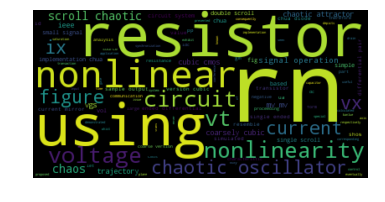

In [147]:
cleaned_papers_pdf['cleaned_content'].ix[339]
WordCloud().generate(" ".join([cleaned_papers_pdf['cleaned_content'].ix[339]]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()